# Projet Maths-Info 2 Cattan/Horsin

# Pas Fixe

 ## Question 1- Schéma d'Euler explicite

On met en place le schéma d'Euler explicite qui est convergent d'ordre 1 : 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_euler_explicit(f, x0, dt, tf, t0=0) :
    T = [0]
    X = [x0]
    while T[-1] <= tf :
        T = T + [ T[-1] + dt] 
        X = X + [ X[-1] + dt*f(X[-1]) ]
    return T, X 

On illustre le bon fonctionnement du programme avec une équation différentielle dont on connaît la solution:

$\dot{x}(t) = - x(t)$

La solution est $g:x\rightarrow exp( -x) $



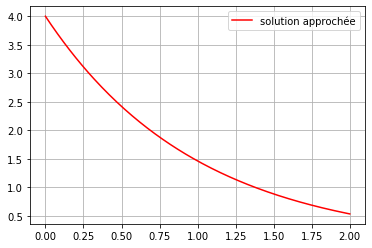

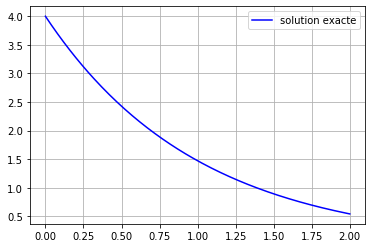

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def g (x) :
    return (-x)

def fonction_test(t):
    return 4*np.exp(-t)

temps  = solve_euler_explicit(g,4,0.01,2)[0]
sol = solve_euler_explicit(g,4,0.01,2)[1]

plt.figure(1)
plt.plot (temps,sol, label="solution approchée", color="r")
plt.grid()
plt.legend()
plt.show()


vrai_sol = np.vectorize(fonction_test)(temps)


plt.figure(2)
plt.plot (temps, vrai_sol, label ="solution exacte", color="b")
plt.grid()
plt.legend()
plt.show()

On ne voit même pas la différence à l'oeil nu !
On va mettre en lumière le fait que ce schéma soit convergent d'ordre 1.
Pour cela, on choisit arbitrairement quelques pas de temps fixe: 
pas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]

Pour chaque valeur de pas de temps, on déterminer le maximum de l'écart.
Puis on trace le maximum de l'écart en fonction de chaque pas de temps:


In [4]:
def convergence_1_euler(dt):
    X = solve_euler_explicit(g,4,dt,2)[1]
    T = solve_euler_explicit(g,4,dt,2)[0] 
    r = 0
    for k in range (1,len(X)):
        s = (abs(X[k]-fonction_test(T[k])))
        if  s > r :
            r = s 
    return r


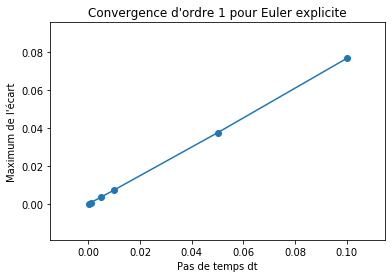

In [5]:
pas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]

y1 = [convergence_1_euler(dt) for dt in pas]

plt.scatter(pas,y1)
plt.plot(pas,y1)
plt.xlabel('Pas de temps dt')
plt.ylabel("Maximum de l'écart")
plt.title("Convergence d'ordre 1 pour Euler explicite")
plt.show()

On remarque que l'erreur maximale et la valeur du pas de temps ont une relation approximativement linéaire, ce qui confirme que le schéma est bien d'ordre 1.

## Question 2- Compraison avec un schéma d'ordre 2 (le schéma de Heun)


On met en place un schéma d'ordre 2, ici le schéma de Heun : 

In [6]:
def solve_heun(f,x0,dt, xf, ):
    T = [0]
    X = [x0]
    while T[-1] <= 4 :
        T = T + [ T[-1] + dt] 
        X = X + [ X[-1] + 0.5*dt*(f(X[-1])+f(X[-1]+dt*f(X[-1]))) ]
    return T, X 

On illustre le bon fonctionnement du programme avec la même équation différentielle dont on connaît la solution:

$\dot{x}(t) = - x(t)$

La solution est $g:x\rightarrow exp( -x) $

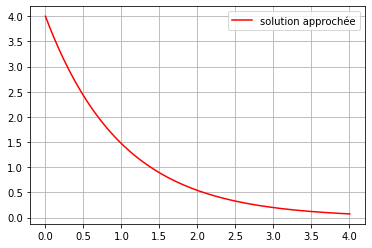

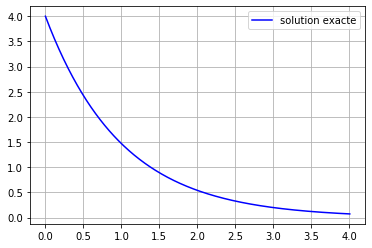

In [7]:
def g (x) :
    return (-x)

def fonction_test(t):
    return 4*np.exp(-t)

temps  = solve_heun(g,4,0.01,2)[0]
sol = solve_heun(g,4,0.01,2)[1]

plt.figure(1)
plt.plot (temps,sol, label="solution approchée", color="r")
plt.grid()
plt.legend()
plt.show()


vrai_sol = np.vectorize(fonction_test)(temps)


plt.figure(2)
plt.plot (temps, vrai_sol, label ="solution exacte", color="b")
plt.grid()
plt.legend()
plt.show()

On va mettre en lumière le fait que ce schéma soit convergent d'ordre 2.
Pour cela, on choisit arbitrairement quelques pas de temps fixe: 
pas = [0.01,0.05,0.,0.5,1]

Pour chaque valeur de pas de temps, on déterminer le maximum de l'écart.
Puis on trace le maximum de l'écart en fonction de chaque pas de temps élevé au carré (car le schéma est convergent d'ordre 2):


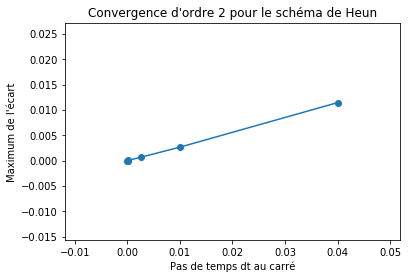

In [8]:
test = np.array([0.001, 0.005, 0.01, 0.05, 0.1,0.2])
pas2 = test**2


def convergence_2_heun(dt):
    X = np.array(solve_heun(g,4,dt,2)[1])
    T = np.array(solve_heun(g,4,dt,2)[0]) 
    S = fonction_test(T)
    R = np.abs(X-S)
    return max(R)

y2 = [convergence_2_heun(dt) for dt in test]

plt.scatter(pas2,y2)
plt.plot(pas2,y2)
plt.xlabel('Pas de temps dt au carré')
plt.ylabel("Maximum de l'écart")
plt.title("Convergence d'ordre 2 pour le schéma de Heun")
plt.show()

On remarque ici que l'erreur maximale est proportionelle à la valeur du pas de temps dt élevé au carré. On a donc bien un schéma d'ordre 2. 

Par rapport au schéma de Euler explicite, on remarque de plus que le coefficient de proportionnalité entre le maximum de l'erreur et l'écart au carré est plus faible que celui qui apparaît dans la convergence du schéma d'ordre 1.


## Question 3- Démonstration de l'égalité mathématique

on suppose que f est   $  C^{1}$.

Montrons que :

$\left\|e^{j+1}\right\|=\Delta t_{j}\frac{\left\|f\left(t_{j+1}, x^{j+1}\right)-f\left(t_{j}, x^{j}\right)\right\|}{2} +O(\Delta t_{j} ^{3})$

On a: \
$ e^{j+1}=\left(x^{j}+\int_{t_{j}}^{t_{j+1}} f(s, x(s)) d s\right)-x^{j+1}$


or pour un schéma d'Euler explicite:

$x^{j+1}=x^{j}+\Delta t_{j}f\left(t_{j},x^{j}\right)$


d'ou:


$e^{j+1}= \int_{t_{j}}^{t_{j+1}}f(s, x(s)) d s-\Delta t_{j}f\left(t_{j},x^{j}\right)$


or $ \dot{x}(t)=f(t,x(t))$


$\Rightarrow e^{j+1}=x\left(t_{j+1}\right)-x\left(t_{j}\right)-\Delta t_{j}f\left(t_{j},x^{j}\right)$


Or comme f est $C^{1}$, on a bien que x est $C^{2}$ d'après l'équation différentielle


En faisant un développement de Taylor à l'ordre 2 en $\Delta t_{j}$:


$e^{j+1}=x\left(t_{j}\right)+\Delta t_{j}\dot{x}(t_{j})+\frac{(\Delta t_{j})^{2}}{2}\ddot{x}\left(t_{j}\right)-x\left(t_{j}\right)-\Delta t_{j}f\left(t_{j},x^{j}\right)+O(\Delta t_{j} ^{3}) $

$\Rightarrow e^{j+1}=\Delta t_{j}\dot{x}(t_{j})+\frac{(\Delta t_{j})^{2}}{2}\ddot{x}\left(t_{j}\right)-\Delta t_{j}f\left(t_{j},x^{j}\right)+O(\Delta t_{j} ^{3}) $


Or comme on s'intéresse à l'erreur locale, $x(t_{j})=x^{j}$\
$\Rightarrow \dot{x}(t_{j})=f(t_{j},x(t_{j}))=f(t_{j},x^{j})$

$\Rightarrow e^{j+1}=\frac{(\Delta t_{j})^{2}}{2}\ddot{x}\left(t_{j}\right)+ O(\Delta t_{j} ^{3}) $

Or en faisant un développement de Taylor de $f$ à l'ordre 1 :

$f\left(t_{j+1}, x^{j+1}\right)=f\left(t_{j}+\Delta t_{j}, x^{j}+\Delta t_{j} f\left(t_{j}, x_{j}\right)\right)$


$=f\left(t_{j}, x^{j}\right)+\Delta t_{j} \partial_{t} f\left(t_{j}, x^{j}\right)+\Delta t_{j}f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right)+O(\Delta t_{j} ^{2})$

$=f\left(t_{j}, x^{j}\right)+\Delta t_{j}\ddot{x}\left(t_{j}\right)+ O(\Delta t_{j} ^{2}) $

$\Rightarrow \frac{(\Delta t_{j})^{2}}{2}\ddot{x}\left(t_{j}\right)=(f\left(t_{j+1}, x^{j+1}\right)-f\left(t_{j}, x^{j}\right))\frac{(\Delta t_{j})}{2}+O(\Delta t_{j} ^{3})$


En combinant cela avec l'équation précédente:

$e^{j+1}=\Delta t_{j}\frac{f\left(t_{j+1}, x^{j+1}\right)-f\left(t_{j}, x^{j}\right)}{2}+O(\Delta t_{j} ^{3})$

On a le résultat en passant à la norme.





## Question 4- Nouveau pas de temps

$\textbf{Dans un premier temps, montrons que $e^{j+1}= O(\Delta t_{j} ^{2})$ }$

D'après la question précédente, $\left\|e^{j+1}\right\|=\Delta t_{j}\frac{\left\|f\left(t_{j+1}, x^{j+1}\right)-f\left(t_{j}, x^{j}\right)\right\|}{2} +O(\Delta t_{j} ^{3})$

or $f\left(t_{j+1}, x^{j+1}\right) = f\left(t_{j}+ \Delta t_{j}, x^{j}+\Delta t_{j}f\left(t_{j},x^{j}\right) \right)$

Or comme f est $C^{1}$, on peut donc faire un Dl à l'ordre 1 en $(t_{j},x^{j})$

D'ou : 

 $f\left(t_{j+1}, x^{j+1}\right) = f\left(t_{j}, x^{j}\right) + \Delta t_{j} \partial_{t} f\left(t_{j}, x^{j}\right)+\Delta t_{j}f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right) + O(\Delta t_{j} ^{2})$

En injectant cela dans l'équation obtenue à la question précédente:

$\left\|e^{j+1}\right\|=\Delta t_{j}\frac{\left\| \Delta t_{j} \partial_{t} f\left(t_{j}, x^{j}\right)+\Delta t_{j}f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right) + O(\Delta t_{j} ^{2})\right\|}{2} +O(\Delta t_{j} ^{3})$


Puis en factorisant par $\Delta t_{j}$:


$\left\|e^{j+1}\right\|=\Delta t_{j}^{2}\frac{\left\| \partial_{t} f\left(t_{j}, x^{j}\right)+
f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right) + O(\Delta t_{j})\right\|}{2} +O(\Delta t_{j} ^{3})$

Or $O(\Delta t_{j} ^{3})$ est bien un $o(\Delta t_{j} ^{2})$


Et pour $ \left\| \partial_{t} f\left(t_{j}, x^{j}\right)+ f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right) + O(\Delta t_{j} ^{2})\right\|$ 
, ce qui est entre la norme tend vers  $ \partial_{t} f\left(t_{j}, x^{j}\right)+ f\left(t_{j}, x^{j}\right) \partial_x f\left(t_{j}, x^{j}\right)$ quand $\Delta t_{j}$ tend vers 0.
Ainsi avec le $\Delta t_{j} ^{2}$ en facteur de la norme, on a bien résultat voulu.







$\textbf{ Montrons maintenant que} $ $\Delta t_{\text {new }}=\Delta t \sqrt {\frac{T o l_{abs }}{\left\|e^{j+1}\right\|}}$ $\textbf{ est un pas de temps approprié pour un algorithme à pas de temps variable.}$

L'idée principale de cet algorithme à pas de temps variable est d'améliorer la vitesse d'exécution du programme en augmentant le pas de temps lorsque l'erreur maximale autorisée n'est pas encore atteinte.

En effet, on sait que $\left\|e^ {j+1}\right\| \leq Tol_{abs}$ et cela implique donc que $\Delta \ t_\text{new} \geq \Delta t$.

De plus, $ Tol_{abs} $ est l'erreur maximale autorisée. Dans le cas où elle est atteinte ie $\left\|e^ {j+1}\right\| = Tol_{abs}$ , alors on a $\Delta \ t_\text{new} = \Delta t$, ce qui correspond à un pas fixe. 

Le fait que la racine carré soit appropriée s'explique de la manière suivante : on sait que $e^{j+1}= O(\Delta t_{j} ^{2})$ , c'est-à-dire que $e^{j+1}= f \Delta t_{j} ^{2} $ avec f bornée et qui ne s'annule pas. De fait, on peut exprimer $\Delta \ t_\text{new}$ de la manière suivante : $\Delta \ t_\text{new} = \Delta t \sqrt {\frac{T o l_{abs }}{f \Delta t_{j} ^{2}}} = \sqrt {\frac{T o l_{abs }}{f}}$. 

Ainsi $f$ étant bornée et non nulle, on est sûr que $ \Delta t_\text{new} $ ne converge ni vers 0 ni ne diverge. 

$\textbf{ Pour conclure}$, l'expression $\Delta t_{\text {new }}=\Delta t \sqrt {\frac{T o l_{abs }}{\left\|e^{j+1}\right\|}}$ est appropriée pour ce problème.

## Question 5 - Algorithme à pas de temps variable

Voici l'algorithme à pas de temps variable :  

In [9]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

## Explication  du code:

L'idée de départ est d'exploiter la formule du pas de temps variable obtenue précédemment.

Pour cela, on part de la base du schéma d'Euler. On sépare notre intervalle $[t_{0}, t_{f}]$ en intervalles de longeur $dt_{max}$.

Et on va ensuite appliquer la méthode du pas de temps de variable dans chacun de ces intervalles. Mais on ne veut pas avoir trop de valeurs sur l'intervalle $[t_{0}, t_{f}]$. On veut donc faire en sorte d'avoir un valeur de $x^{j}$ tous les dtmax.

#### 1er intervalle entre $t_{0}$ et  $t_{0} + dt_{max}$:

0n initialise la valeur du pas de temps à $dt=dt_{max}/10$
Puis on applique le schéma d'Euler classique entre $t_{0}$ et $t_{0} + dt$

Mais d'après la question précédente, on sait lier une valeur optimale du prochain pas de temps avec la norme de l'erreur.

${x}$_next correspond à la valeur intermédiaire de la solution, calculée à partir du point intermédiaire précédent, nommé $x$. 


La partie:

$$ {x}_{back} = {x}_{next} - dt * f({x}_{next})$$

$$ratioabserror = atol \frac{(linalg.norm({x}_{back}-x))}{2}$$

$$dt = 0.9 * dt * sqrt(ratioabserror)$$

permet de définir le nouveau $dt$ (on multiplie par 0.9 pour définir une marge de sécurité).

On vérifie que le nouveau pas de temps ne soit pas inférieur à $dt_{min}$, ni supérieur à $dt_{max}/2$ (on veut au moins 2 points).






$$    $$

$$ \textbf {Illustration du choix du pas de temps} $$ 

![alt text](schéma1_pmi.jpg "Illustration du choix du pas de temps")

Puis dès qu'on sort de la sous-boucle, cela signifie que ti est supérieur à dtmax. On a donc dépassé l'intervalle de longeur $dt$.

Pour trouver la valeur $x^{1}$ que l'on va attribuer à l'intant $dt_{max}+t_{0}$ , on applique à nouveau un schéma d'Euler explicite entre $t_{i}$ et $dt_{max}$.

En notant $dt2DT$ l'écart (négatif) entre $dt_{max}$ et $t_{i}$, on a:

$x^{1}= x+dt2DT*f(x) $

On attribue ainsi une certaine valeur $x_{1}$, pour le temps $t_{1} = dt_{max}+t_{0}$ (on stocke uniquement cela sur cet intervalle de longeur $dt$.



$$ $$ 
$$ \textbf { Illustration d'une fin de boucle while } $$

![alt text](schéma2_pmi.jpg)

#### 2ème intervalle entre $t_{0} + dt_{max}$  et  $t_{0} + 2 dt_{max}$:

On initialise $t$ à $t_{1}$ (une sorte de varaible de temps globale)

Puis on réinitialise $t_{1}$ à 0 pour réapliquer exactement le même procédé à l'intervalle $[t_{0}+dt_{max}, t_{0}+2dt_{max}]$

Puis on recommance l'opération jusqu'à arriver à $t_{f}$.


